# Link Dashboard
https://public.tableau.com/views/AnalisaPerolehanHadiahPlayerE-Sport/AnalisaPerolehanHadiahPlayerE-Sport?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# MILESTONES 1

```txt
Nama : Andre Lie
Batch : FTDS 03 (Offline)
```

## Description

### Objective

S : Player e-sport, benua, jumlah player, kategori game

M : Tingkat nilai hadiah E-sport

A : -

R : -

T : -

Objective SMART : Mengetahui tingkat nilai hadiah E-sport berdasarkan benua playernya, jumlah player, dan kategori game

### Problem Statement
1. Siapa player dengan perolehan hadiah E-sport terbanyak ?
2. Apa game yang paling sedikit player E-sportnya ?
3. Ada berapa banyak player E-sport berdasarkan benuanya ?
4. Berapa rentang total hadiah terbesar dan terkecil yang diperoleh player E-sport ? 
5. Berapa rata-rata hadiah player E-sport dari masing-masing game ?
6. Berapa hadiah yang diperoleh player E-sport berdasarkan kategory gamenya ?
8. Apakah ada hubungan antara banyaknya pemain E-sport dengan hadiah yang diperoleh dari masing-masing game ?

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
pd.set_option('display.max_columns', None)

## Loading Data

Source data :
1. https://www.kaggle.com/datasets/jackdaoud/esports-earnings-for-players-teams-by-game
2. https://www.kaggle.com/datasets/khaiid/most-selling-pc-games
3. https://www.kaggle.com/datasets/rahuldabholkar/steam-pc-games

Import dataset

In [2]:
steamsale = pd.DataFrame(pd.read_csv('Dataset\Games Sales.csv'))
steamgame = pd.DataFrame(pd.read_csv('Dataset\games_data.csv', encoding = 'unicode_escape'))
country = pd.DataFrame(pd.read_csv('Dataset\country-and-continent-codes-list.csv'))
player_earning = pd.DataFrame(pd.read_csv('Dataset\highest_earning_players.csv'))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3064\4129392286.py:2: DtypeWarning: Columns (0,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  steamgame = pd.DataFrame(pd.read_csv('Dataset\games_data.csv', encoding = 'unicode_escape'))


## Data Preprocessing

### 1. Joining Data

In [3]:
country['Two_Letter_Country_Code'] = country['Two_Letter_Country_Code'].str.lower() #menyamakan format PK dan FK agar dapat dijoin

In [4]:
game_sale = pd.merge(steamgame,
                    steamsale,
                    left_on = 'title',
                    right_on ='Name',
                    how='outer') #join table game dengan sale

gs_player = pd.merge(game_sale,
                      player_earning,
                      left_on ='title',
                      right_on = 'Game',
                      how = 'outer') # join table player earning kedalam table game sale

df = pd.merge(gs_player,
                    country,
                    left_on = 'CountryCode',
                    right_on = 'Two_Letter_Country_Code',
                    how = 'outer') # join table country kedalam table game sale player earning

In [5]:
df['Game_name'] = df['title'].fillna(df['Name']).fillna(df['Game']) #mengabungkan kolom nama game
df

,id,title,release_date,developer,publisher,genres,multiplayer_or_singleplayer,price,dc_price,overall_review,detailed_review,reviews,percent_positive,win_support,mac_support,lin_support,Name,Sales,Series,Release,Genre_x,Developer,Publisher,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre_y,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number,Game_name
0,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3883.0,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
1,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3679.0,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
2,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3885.0,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
3,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3672.0,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
4,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17800.0,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,AF,"Zambia, Republic of",zm,ZMB,894.0,NaN
74692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,OC,Disputed Territory,xx,NaN,NaN,NaN
74693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,AS,Iraq-Saudi Arabia Neutral Zone,xe,NaN,NaN,NaN
74694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,AS,United Nations Neutral Zone,xd,NaN,NaN,NaN


### 2. Cleaning Data

A. Menghilangkan data kosong yang hanya berisi country

In [6]:
df.drop(df[(df['id'].isna()) &
           (df['Genre_y'].isna())].index, inplace=True) # drop id & by genre_y yang kosong
df

,id,title,release_date,developer,publisher,genres,multiplayer_or_singleplayer,price,dc_price,overall_review,detailed_review,reviews,percent_positive,win_support,mac_support,lin_support,Name,Sales,Series,Release,Genre_x,Developer,Publisher,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre_y,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number,Game_name
0,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3883.0,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
1,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3679.0,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
2,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3885.0,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
3,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3672.0,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
4,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17800.0,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75020.0,Aum,Chatchanapong,Happy,th,40376.87,Arena of Valor,Multiplayer Online Battle Arena,Asia,AS,"Thailand, Kingdom of",th,THA,764.0,Arena of Valor
74490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54450.0,Chanapol,Siri,Sky,th,28083.35,Arena of Valor,Multiplayer Online Battle Arena,Asia,AS,"Thailand, Kingdom of",th,THA,764.0,Arena of Valor
74491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21212.0,Chattrakarn,Parichatkun,Erl2oR,th,27074.40,Arena of Valor,Multiplayer Online Battle Arena,Asia,AS,"Thailand, Kingdom of",th,THA,764.0,Arena of Valor
74492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12241.0,Komklit,Wongsawat,O7T-V1,th,25941.03,Arena of Valor,Multiplayer Online Battle Arena,Asia,AS,"Thailand, Kingdom of",th,THA,764.0,Arena of Valor


B. Menghapus data yang tidak terdapat player E-sportnya

In [7]:
df.drop(df[(df['CurrentHandle'].isna())].index, inplace=True)
df.reset_index(inplace=True)
df

,index,id,title,release_date,developer,publisher,genres,multiplayer_or_singleplayer,price,dc_price,overall_review,detailed_review,reviews,percent_positive,win_support,mac_support,lin_support,Name,Sales,Series,Release,Genre_x,Developer,Publisher,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre_y,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number,Game_name
0,0,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3883.0,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
1,1,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3679.0,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
2,2,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3885.0,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
3,3,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3672.0,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
4,4,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17800.0,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",dk,DNK,208.0,Counter-Strike: Global Offensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,74489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75020.0,Aum,Chatchanapong,Happy,th,40376.87,Arena of Valor,Multiplayer Online Battle Arena,Asia,AS,"Thailand, Kingdom of",th,THA,764.0,Arena of Valor
1028,74490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54450.0,Chanapol,Siri,Sky,th,28083.35,Arena of Valor,Multiplayer Online Battle Arena,Asia,AS,"Thailand, Kingdom of",th,THA,764.0,Arena of Valor
1029,74491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21212.0,Chattrakarn,Parichatkun,Erl2oR,th,27074.40,Arena of Valor,Multiplayer Online Battle Arena,Asia,AS,"Thailand, Kingdom of",th,THA,764.0,Arena of Valor
1030,74492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12241.0,Komklit,Wongsawat,O7T-V1,th,25941.03,Arena of Valor,Multiplayer Online Battle Arena,Asia,AS,"Thailand, Kingdom of",th,THA,764.0,Arena of Valor


C. Menghapus kolom yang tidak dibutuhkan dan kolom duplikat

In [8]:
df.drop(['index','id','publisher','multiplayer_or_singleplayer','reviews','percent_positive','Series','Release','Genre_x','Developer','Publisher','Genre_y','overall_review','detailed_review','PlayerId','CountryCode','Continent_Code',
         'Two_Letter_Country_Code','Three_Letter_Country_Code','Country_Number','title', 'Name', 'Game'], axis=1, inplace=True)
df

,release_date,developer,genres,price,dc_price,win_support,mac_support,lin_support,Sales,NameFirst,NameLast,CurrentHandle,TotalUSDPrize,Continent_Name,Country_Name,Game_name
0,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,Free to play,Free to play,1,1.0,1.0,NaN,Peter,Rasmussen,dupreeh,1822989.41,Europe,"Denmark, Kingdom of",Counter-Strike: Global Offensive
1,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,Free to play,Free to play,1,1.0,1.0,NaN,Andreas,Højsleth,Xyp9x,1799288.57,Europe,"Denmark, Kingdom of",Counter-Strike: Global Offensive
2,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,Free to play,Free to play,1,1.0,1.0,NaN,Nicolai,Reedtz,dev1ce,1787489.88,Europe,"Denmark, Kingdom of",Counter-Strike: Global Offensive
3,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,Free to play,Free to play,1,1.0,1.0,NaN,Lukas,Rossander,gla1ve,1652350.75,Europe,"Denmark, Kingdom of",Counter-Strike: Global Offensive
4,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,Free to play,Free to play,1,1.0,1.0,NaN,Emil,Reif,Magisk,1416448.64,Europe,"Denmark, Kingdom of",Counter-Strike: Global Offensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aum,Chatchanapong,Happy,40376.87,Asia,"Thailand, Kingdom of",Arena of Valor
1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chanapol,Siri,Sky,28083.35,Asia,"Thailand, Kingdom of",Arena of Valor
1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chattrakarn,Parichatkun,Erl2oR,27074.40,Asia,"Thailand, Kingdom of",Arena of Valor
1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Komklit,Wongsawat,O7T-V1,25941.03,Asia,"Thailand, Kingdom of",Arena of Valor


D. Mengecheck data duplikat

In [9]:
df.duplicated().value_counts()

False    1032
dtype: int64

Tidak terdapat data duplikat dari data yang sudah di bersihkan

E. Merapihkan kolom order dan menganti nama kolom

In [10]:
# order kolom
df = df[['Game_name', 'release_date','developer', 'genres', 'Sales', 'price', 'dc_price', 'win_support', 'mac_support', 'lin_support', 'NameFirst', 'NameLast', 'CurrentHandle', 'TotalUSDPrize', 'Country_Name', 'Continent_Name']]

In [11]:
# rename kolom
df.rename(columns = {'Game_name' : 'game', 'release_date' : 'tanggal_rilis', 'developer' : 'pengembang',
                     'Sales' : 'penjualan_dalam_juta', 'price' : 'harga_asli_dalam_inr', 'dc_price' : 'harga_diskon_dalam_inr',
                     'NameFirst' : 'nama_depan', 'NameLast' : 'nama_belakang', 'CurrentHandle' : 'nickname_game',
                     'TotalUSDPrize' : 'total_hadiah_dalam_usd', 'Country_Name' : 'asal_negara', 'Continent_Name' : 'benua'}, inplace=True)
df

,game,tanggal_rilis,pengembang,genres,penjualan_dalam_juta,harga_asli_dalam_inr,harga_diskon_dalam_inr,win_support,mac_support,lin_support,nama_depan,nama_belakang,nickname_game,total_hadiah_dalam_usd,asal_negara,benua
0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,NaN,Free to play,Free to play,1,1.0,1.0,Peter,Rasmussen,dupreeh,1822989.41,"Denmark, Kingdom of",Europe
1,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,NaN,Free to play,Free to play,1,1.0,1.0,Andreas,Højsleth,Xyp9x,1799288.57,"Denmark, Kingdom of",Europe
2,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,NaN,Free to play,Free to play,1,1.0,1.0,Nicolai,Reedtz,dev1ce,1787489.88,"Denmark, Kingdom of",Europe
3,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,NaN,Free to play,Free to play,1,1.0,1.0,Lukas,Rossander,gla1ve,1652350.75,"Denmark, Kingdom of",Europe
4,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,NaN,Free to play,Free to play,1,1.0,1.0,Emil,Reif,Magisk,1416448.64,"Denmark, Kingdom of",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Arena of Valor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aum,Chatchanapong,Happy,40376.87,"Thailand, Kingdom of",Asia
1028,Arena of Valor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chanapol,Siri,Sky,28083.35,"Thailand, Kingdom of",Asia
1029,Arena of Valor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chattrakarn,Parichatkun,Erl2oR,27074.40,"Thailand, Kingdom of",Asia
1030,Arena of Valor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Komklit,Wongsawat,O7T-V1,25941.03,"Thailand, Kingdom of",Asia


F. Mengubah data INR menjadi USD

F.1. Mengecheck tipe data dari masing-masing kolom pada dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game                    1032 non-null   object 
 1   tanggal_rilis           216 non-null    object 
 2   pengembang              216 non-null    object 
 3   genres                  216 non-null    object 
 4   penjualan_dalam_juta    0 non-null      float64
 5   harga_asli_dalam_inr    216 non-null    object 
 6   harga_diskon_dalam_inr  216 non-null    object 
 7   win_support             216 non-null    object 
 8   mac_support             216 non-null    float64
 9   lin_support             216 non-null    float64
 10  nama_depan              1032 non-null   object 
 11  nama_belakang           1032 non-null   object 
 12  nickname_game           1032 non-null   object 
 13  total_hadiah_dalam_usd  1032 non-null   float64
 14  asal_negara             1032 non-null   

agar data dapa diubah tipenya menjadi numberic data berupa string text harus diubah menjadi string number

In [13]:
# menganti value free to play menjadi 0
df['harga_asli_dalam_inr'] = np.where(df['harga_asli_dalam_inr'] == 'Free to play', 0, df['harga_asli_dalam_inr'])
df['harga_diskon_dalam_inr'] = np.where(df['harga_diskon_dalam_inr'] == 'Free to play', 0, df['harga_diskon_dalam_inr'])

In [14]:
# menganti tipe data menjadi float
df['harga_diskon_dalam_inr'] = df['harga_diskon_dalam_inr'].astype(float)
df['harga_asli_dalam_inr'] = df['harga_asli_dalam_inr'].astype(float)
df['win_support'] = df['win_support'].astype(float)
df['tanggal_rilis'] = pd.to_datetime(df['tanggal_rilis'], format='%Y-%m-%d')

pengecheckan ulang tipe data baru

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game                    1032 non-null   object        
 1   tanggal_rilis           216 non-null    datetime64[ns]
 2   pengembang              216 non-null    object        
 3   genres                  216 non-null    object        
 4   penjualan_dalam_juta    0 non-null      float64       
 5   harga_asli_dalam_inr    216 non-null    float64       
 6   harga_diskon_dalam_inr  216 non-null    float64       
 7   win_support             216 non-null    float64       
 8   mac_support             216 non-null    float64       
 9   lin_support             216 non-null    float64       
 10  nama_depan              1032 non-null   object        
 11  nama_belakang           1032 non-null   object        
 12  nickname_game           1032 non-null   object  

data yang kita ubah type datanya telah berubah tipe datanya

F.2. Melakukan kalkulasi inr ke usd

In [16]:
# kalkulasi inr ke usd ke masing-masing kolom
df['harga_asli_dalam_inr'], df['harga_diskon_dalam_inr'] = df['harga_asli_dalam_inr'] * 0.012, df['harga_diskon_dalam_inr']* 0.012

In [17]:
# menganti nama kolom setelah dikalkulasikan kembali
df.rename(columns = {'harga_asli_dalam_inr' : 'harga_asli_dalam_usd', 'harga_diskon_dalam_inr' : 'harga_diskon_dalam_usd'}, inplace=True)
df

,game,tanggal_rilis,pengembang,genres,penjualan_dalam_juta,harga_asli_dalam_usd,harga_diskon_dalam_usd,win_support,mac_support,lin_support,nama_depan,nama_belakang,nickname_game,total_hadiah_dalam_usd,asal_negara,benua
0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,NaN,0.0,0.0,1.0,1.0,1.0,Peter,Rasmussen,dupreeh,1822989.41,"Denmark, Kingdom of",Europe
1,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,NaN,0.0,0.0,1.0,1.0,1.0,Andreas,Højsleth,Xyp9x,1799288.57,"Denmark, Kingdom of",Europe
2,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,NaN,0.0,0.0,1.0,1.0,1.0,Nicolai,Reedtz,dev1ce,1787489.88,"Denmark, Kingdom of",Europe
3,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,NaN,0.0,0.0,1.0,1.0,1.0,Lukas,Rossander,gla1ve,1652350.75,"Denmark, Kingdom of",Europe
4,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,NaN,0.0,0.0,1.0,1.0,1.0,Emil,Reif,Magisk,1416448.64,"Denmark, Kingdom of",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Arena of Valor,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aum,Chatchanapong,Happy,40376.87,"Thailand, Kingdom of",Asia
1028,Arena of Valor,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chanapol,Siri,Sky,28083.35,"Thailand, Kingdom of",Asia
1029,Arena of Valor,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chattrakarn,Parichatkun,Erl2oR,27074.40,"Thailand, Kingdom of",Asia
1030,Arena of Valor,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Komklit,Wongsawat,O7T-V1,25941.03,"Thailand, Kingdom of",Asia


Deskripsi Tabel
1. kolom game berisi tentang informasi nama dari game yang dimainkan
2. kolom tanggal rilis berisi tentang informasi tanggal kapan game dirilis
3. kolom pengembang berisi tentang informasi nama perusahaan pengembang game
4. kolom genres berisi informasi tentang kategori game
5. kolom penjualan berisi tentang informasi berapa banyak unit game yang terjual
6. kolom harga asli dalam usd berisi tentang informasi berapa harga awal game sebelum diskon
7. kolom harga diskon dalam usd berisi tentang informasi berapa harga game setelah diskon
8. kolom win / mac / lin support berisi tentang informasi apakah game support pada operator sistem tersebut atau tidak ? 1 = support 0 = tidak support
9. kolom nama berisi tentang informasi nama player E-sport
10. kolom nickname game berisi tentang informasi nama player E-sport didalam game
11. kolom total hadiah dalam usd berisi tentang informasi total hadiah yang dimenangkan oleh player E-sport selama bertanding ditingkat kejuaraan (diluar gaji)
12. kolom asal negara kota berisi tentang informasi negara dari player E-sport
12. kolom benua berisi tentang informasi benua dari player E-sport

G. Menangani Missing Values

In [18]:
df['pengembang'].fillna('Not Available', inplace=True)
df['genres'].fillna('Not Available', inplace=True)
df['penjualan_dalam_juta'].fillna(0, inplace=True)
df['harga_asli_dalam_usd'].fillna(0, inplace=True)
df['harga_diskon_dalam_usd'].fillna(0, inplace=True)
df

,game,tanggal_rilis,pengembang,genres,penjualan_dalam_juta,harga_asli_dalam_usd,harga_diskon_dalam_usd,win_support,mac_support,lin_support,nama_depan,nama_belakang,nickname_game,total_hadiah_dalam_usd,asal_negara,benua
0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,0.0,0.0,0.0,1.0,1.0,1.0,Peter,Rasmussen,dupreeh,1822989.41,"Denmark, Kingdom of",Europe
1,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,0.0,0.0,0.0,1.0,1.0,1.0,Andreas,Højsleth,Xyp9x,1799288.57,"Denmark, Kingdom of",Europe
2,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,0.0,0.0,0.0,1.0,1.0,1.0,Nicolai,Reedtz,dev1ce,1787489.88,"Denmark, Kingdom of",Europe
3,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,0.0,0.0,0.0,1.0,1.0,1.0,Lukas,Rossander,gla1ve,1652350.75,"Denmark, Kingdom of",Europe
4,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Action;Free to Play,0.0,0.0,0.0,1.0,1.0,1.0,Emil,Reif,Magisk,1416448.64,"Denmark, Kingdom of",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Arena of Valor,NaT,Not Available,Not Available,0.0,0.0,0.0,NaN,NaN,NaN,Aum,Chatchanapong,Happy,40376.87,"Thailand, Kingdom of",Asia
1028,Arena of Valor,NaT,Not Available,Not Available,0.0,0.0,0.0,NaN,NaN,NaN,Chanapol,Siri,Sky,28083.35,"Thailand, Kingdom of",Asia
1029,Arena of Valor,NaT,Not Available,Not Available,0.0,0.0,0.0,NaN,NaN,NaN,Chattrakarn,Parichatkun,Erl2oR,27074.40,"Thailand, Kingdom of",Asia
1030,Arena of Valor,NaT,Not Available,Not Available,0.0,0.0,0.0,NaN,NaN,NaN,Komklit,Wongsawat,O7T-V1,25941.03,"Thailand, Kingdom of",Asia


Pengisian missing value sebisa mungkin dilakukan dengan data yang sama typenya dengan data yang tersedia pada table
1. kolom pengembang & Genres dapat kita isi not available karena kita tidak tau siapa pengembangnya atau pun jenis gamenya
2. kolom penjualan dalam juta, harga asli dalam usd, dan harga diskon dalam usd dapat kita input 0 dengan anggapan bahwa game tersebut dapat diakses secara gratis
3. kolom yang lain tidak dapat diinput karena keterbatasan data dan tidak dapat diinputasi berdasarkan distribusi datanya

### 3. Problem Solving

#### 3.1. Siapa player dengan perolehan hadiah E-sport terbanyak ?

In [19]:
# menampilkan nama pemain berdasarkan nilai total hadiah tertinggi
df[df['total_hadiah_dalam_usd'] == df['total_hadiah_dalam_usd'].min()][['game', 'nama_depan', 'nama_belakang', 'nickname_game', 'total_hadiah_dalam_usd']]

,game,nama_depan,nama_belakang,nickname_game,total_hadiah_dalam_usd
628,Arena of Valor,-,-,139,24171.67


#### 3.2. Apa game yang paling sedikit player E-sportnya ?

In [20]:
lessplayergame = (df.groupby('game')['nickname_game'].count().sort_values()).reset_index()
lessplayergame

,game,nickname_game
0,Arena of Valor,100
1,Heroes of the Storm,100
2,League of Legends,100
3,Starcraft II,100
4,Overwatch,101
5,Fortnite,103
6,Dota 2,104
7,Hearthstone,105
8,PUBG,107
9,Counter-Strike: Global Offensive,112


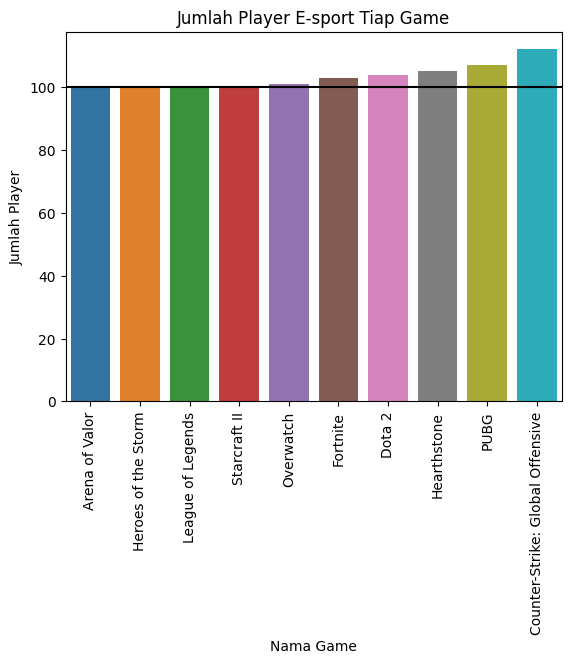

In [21]:
sns.barplot(data= lessplayergame, x='game', y='nickname_game')
plt.xticks(rotation=90)
plt.title('Jumlah Player E-sport Tiap Game')
plt.xlabel('Nama Game')
plt.ylabel('Jumlah Player')
plt.axhline(lessplayergame['nickname_game'].min(), color='black') # menampilkan garis batas dari jumlah player yang paling sedikit

Terdapat 4 game dengan jumlah player E-Sport paling sedikit yaitu:
1. Arena of Valor
2. Heroes of the Storm
3. League of Legends
4. Starcraft 2

#### 3.3. Ada berapa banyak player E-sport berdasarkan benuanya?

In [22]:
playerbyregion = (df.groupby('benua')['nickname_game'].count().sort_values(ascending=False)).reset_index()
playerbyregion

,benua,nickname_game
0,Asia,552
1,Europe,309
2,North America,153
3,South America,13
4,Oceania,5


Text(0, 0.5, 'Jumlah Player')

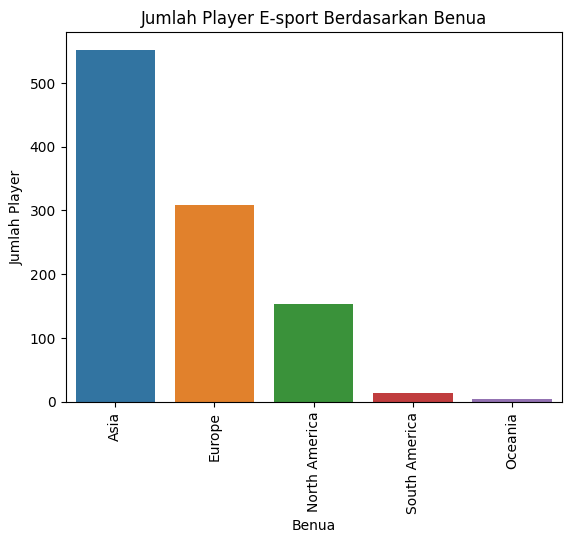

In [23]:
sns.barplot(data= playerbyregion, x='benua', y='nickname_game')
plt.xticks(rotation=90)
plt.title('Jumlah Player E-sport Berdasarkan Benua')
plt.xlabel('Benua')
plt.ylabel('Jumlah Player')

#### 3.4. Berapa rentang total hadiah terbesar dan terkecil yang diperoleh player E-sport? 

In [24]:
print('hadiah terbesar : $', '{:,.2f}'.format(df['total_hadiah_dalam_usd'].max()))
print('hadiah terkecil : $', '{:,.2f}'.format(df['total_hadiah_dalam_usd'].min()))
rangehadiah = df['total_hadiah_dalam_usd'].max() - df['total_hadiah_dalam_usd'].min()
print('Rentang antara perolehan hadiah terkecil dan terbesar adalah $', '{:,.2f}'.format(rangehadiah))

hadiah terbesar : $ 6,952,596.58
hadiah terkecil : $ 24,171.67
Rentang antara perolehan hadiah terkecil dan terbesar adalah $ 6,928,424.91


#### 3.5. Berapa rata-rata hadiah player E-sport dari masing-masing game ?

In [25]:
avgbygame = df.groupby('game')['total_hadiah_dalam_usd'].mean().sort_values(ascending=False).reset_index()
print('rata-rata hadiah player E-sport : $', '{:,.2f}'.format(df['total_hadiah_dalam_usd'].mean()))
avgbygame

rata-rata hadiah player E-sport : $ 398,308.28


,game,total_hadiah_dalam_usd
0,Dota 2,1.786382e+06
1,Counter-Strike: Global Offensive,5.432459e+05
2,Fortnite,4.268487e+05
3,League of Legends,3.504348e+05
4,Starcraft II,2.537982e+05
5,Hearthstone,1.352989e+05
6,PUBG,1.243513e+05
7,Overwatch,1.228887e+05
8,Heroes of the Storm,1.178045e+05
9,Arena of Valor,8.333952e+04


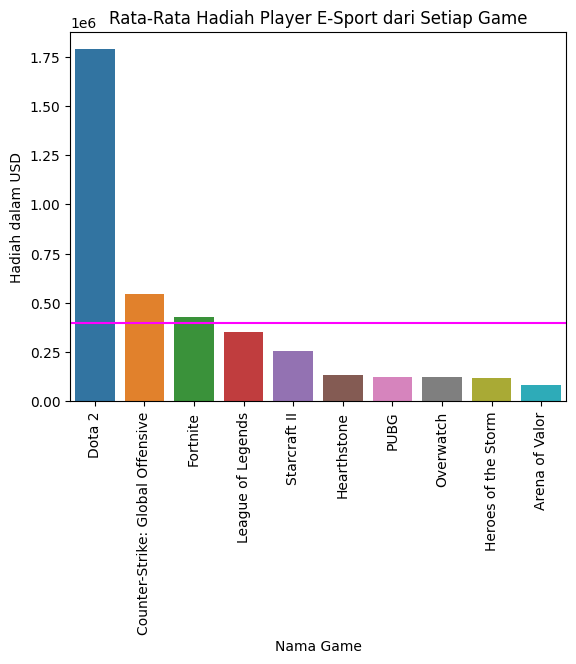

In [26]:
sns.barplot(data=avgbygame, x='game', y='total_hadiah_dalam_usd')
plt.xticks(rotation=90)
plt.xlabel('Nama Game')
plt.title('Rata-Rata Hadiah Player E-Sport dari Setiap Game')
plt.ylabel('Hadiah dalam USD')
plt.axhline(y = df['total_hadiah_dalam_usd'].mean(), color='magenta') # menampilkan garis nilai rata-rata hadiah dari seluruh player E-sport

Terlihat bahwa rata-rata hadiah player E-sport dota 2, Counter Strike: Global Offensive, dan Fornite berada diatas rata-rata hadiah seluruh player E-sport

#### 3.6. Berapa hadiah yang diperoleh player E-sport berdasarkan kategory gamenya ?

In [27]:
hadiahbygenres = df.groupby('genres')['total_hadiah_dalam_usd'].sum().sort_values(ascending=False).reset_index()
hadiahbygenres

,genres,total_hadiah_dalam_usd
0,Action;Free to Play;Strategy,1.857838e+08
1,Not Available,1.644269e+08
2,Action;Free to Play,6.084354e+07


Text(0, 0.5, 'Hadiah dalam USD')

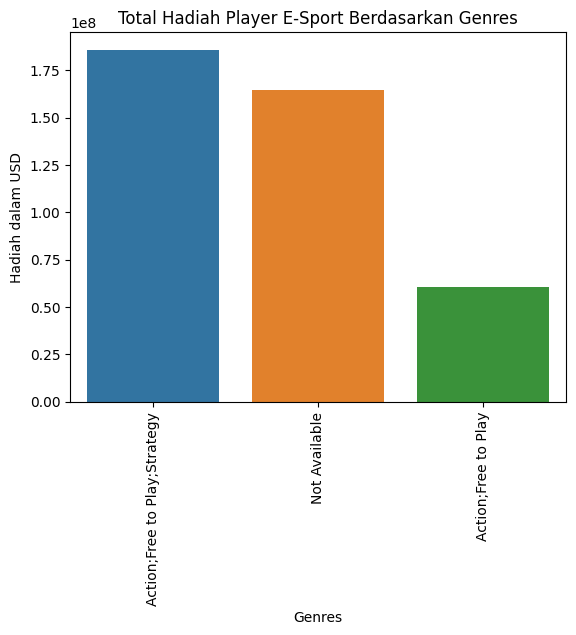

In [28]:
sns.barplot(data= hadiahbygenres, x='genres', y='total_hadiah_dalam_usd')
plt.xticks(rotation=90)
plt.title('Total Hadiah Player E-Sport Berdasarkan Genres')
plt.xlabel('Genres')
plt.ylabel('Hadiah dalam USD')

#### 3.7. Apakah ada hubungan antara banyaknya pemain E-sport dengan hadiah yang diperoleh dari masing-masing game ?

Hipotesa Testing

H0 : banyak hadiah yang diperoleh dari masing-masing game tidak berhubungan dengan banyaknya pemain E-sport

Halt : banyak hadiah yang diperoleh dari masing-masing game berhubungan dengan banyaknya pemain E-sport

In [29]:
chitest = df.groupby('game')['nickname_game','total_hadiah_dalam_usd'].agg({'nickname_game' : 'count', 'total_hadiah_dalam_usd' : 'sum'})
chitest

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3064\232789784.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chitest = df.groupby('game')['nickname_game','total_hadiah_dalam_usd'].agg({'nickname_game' : 'count', 'total_hadiah_dalam_usd' : 'sum'})


,nickname_game,total_hadiah_dalam_usd
game,,
Arena of Valor,100,8.333952e+06
Counter-Strike: Global Offensive,112,6.084354e+07
Dota 2,104,1.857838e+08
Fortnite,103,4.396542e+07
Hearthstone,105,1.420638e+07
Heroes of the Storm,100,1.178045e+07
League of Legends,100,3.504348e+07
Overwatch,101,1.241176e+07
PUBG,107,1.330559e+07


In [30]:
chistat, Pval, DoF, expected = st.chi2_contingency(chitest)
print('Pvalue :', Pval)
if Pval > 0.05 :
    print('banyak hadiah yang diperoleh dari masing-masing game tidak berhubungan dengan banyaknya pemain E-sport')
else:
    print('banyak hadiah yang diperoleh dari masing-masing game berhubungan dengan banyaknya pemain E-sport')

Pvalue : 2.959186709102215e-260
banyak hadiah yang diperoleh dari masing-masing game berhubungan dengan banyaknya pemain E-sport


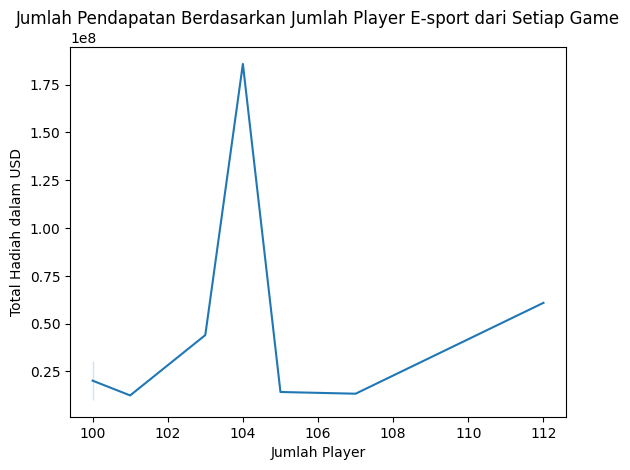

In [31]:
sns.lineplot(data=chitest, x='nickname_game', y='total_hadiah_dalam_usd')
plt.xlabel('Jumlah Player')
plt.ylabel('Total Hadiah dalam USD')
plt.title('Jumlah Pendapatan Berdasarkan Jumlah Player E-sport dari Setiap Game')
plt.savefig('Corr.Jpg')

## Conclusions

1. Benua dengan pendapatan hadiah E-sport terbanyak adalah **Asia**
2. Kategori yang paling banyak nilai hadia E-sportnya adalah **Action;Multiplayer;Strategy**
3. Banyaknya jumlah hadiah yang diperoleh berkaitan dengan banyaknya pemain E-sport pada suatu game

In [32]:
# Download data frame for dashboard
df.to_csv(r'D:\Bootcamp\Data Scientist\Assigment\Milestone\p0---ftds003---hck---m1-AndreLie95\DataFrame.csv', index=False)